In [1]:
import torch
torch.cuda.get_device_name()

C:\Users\omshi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


'NVIDIA GeForce RTX 3050 Ti Laptop GPU'

In [11]:
import tensorflow as tf
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = tf.keras.datasets.fashion_mnist.load_data()

In [6]:
(x_train,y_train),(x_test,y_test) = data
print(x_train.shape)
labels =["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]   #From Documentation

(60000, 28, 28)


Ankle boot


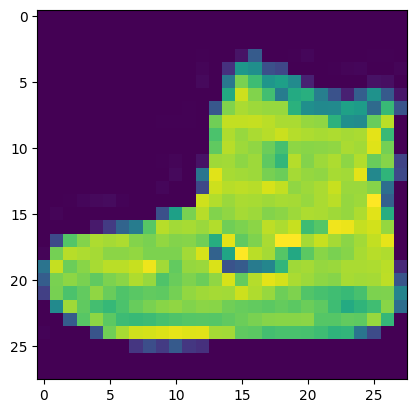

In [7]:
plt.imshow(x_train[0])
print(labels[y_train[0]])

<AxesSubplot:ylabel='count'>

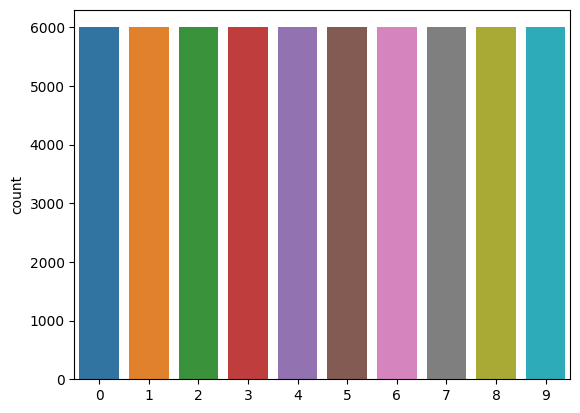

In [8]:
sns.countplot(x=y_train)

In [9]:
x_train = x_train/255.0
x_test = x_test/255.0

In [12]:
y_train = tf.one_hot(y_train.astype(np.int32), depth=10)
y_test = tf.one_hot(y_test.astype(np.int32), depth=10)

In [13]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32,(5,5), padding='same', activation='relu', input_shape=(28, 28, 1),),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(strides=(2,2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

In [14]:
history = model.fit(x_train, y_train,
                    batch_size=1,
                    epochs=10,
                    validation_split=0.1,)

Epoch 1/10
54000/54000 [==============================] - 345s 6ms/step - loss: 0.4509 - acc: 0.8365 - val_loss: 0.3468 - val_acc: 0.8690
Epoch 2/10
54000/54000 [==============================] - 339s 6ms/step - loss: 0.3823 - acc: 0.8625 - val_loss: 0.3391 - val_acc: 0.8762
Epoch 3/10
54000/54000 [==============================] - 331s 6ms/step - loss: 0.3777 - acc: 0.8662 - val_loss: 0.3766 - val_acc: 0.8595
Epoch 4/10
54000/54000 [==============================] - 328s 6ms/step - loss: 0.3787 - acc: 0.8644 - val_loss: 0.3330 - val_acc: 0.8757
Epoch 5/10
54000/54000 [==============================] - 329s 6ms/step - loss: 0.3820 - acc: 0.8631 - val_loss: 0.3639 - val_acc: 0.8755
Epoch 6/10
54000/54000 [==============================] - 329s 6ms/step - loss: 0.3845 - acc: 0.8651 - val_loss: 0.3239 - val_acc: 0.8842
Epoch 7/10
54000/54000 [==============================] - 330s 6ms/step - loss: 0.3812 - acc: 0.8643 - val_loss: 0.3470 - val_acc: 0.8717
Epoch 8/10
54000/54000 [==========

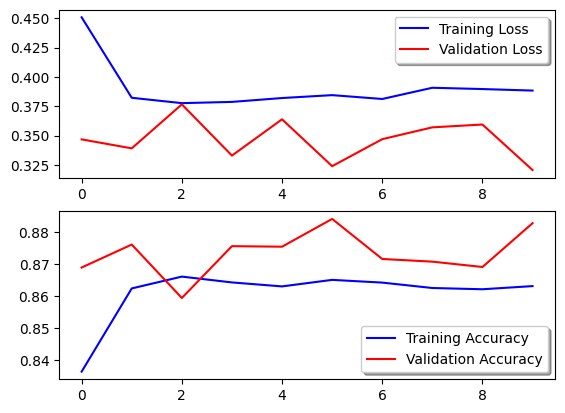

In [15]:
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training Loss")
ax[0].plot(history.history['val_loss'], color='r', label="Validation Loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['acc'], color='b', label="Training Accuracy")
ax[1].plot(history.history['val_acc'], color='r',label="Validation Accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [16]:
Y_pred = model.predict(x_test) 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
Y_true = np.argmax(y_test,axis = 1)
confusion_mtx = tf.math.confusion_matrix(Y_true, Y_pred_classes) 

313/313 [==============================] - 1s 2ms/step


<AxesSubplot:>

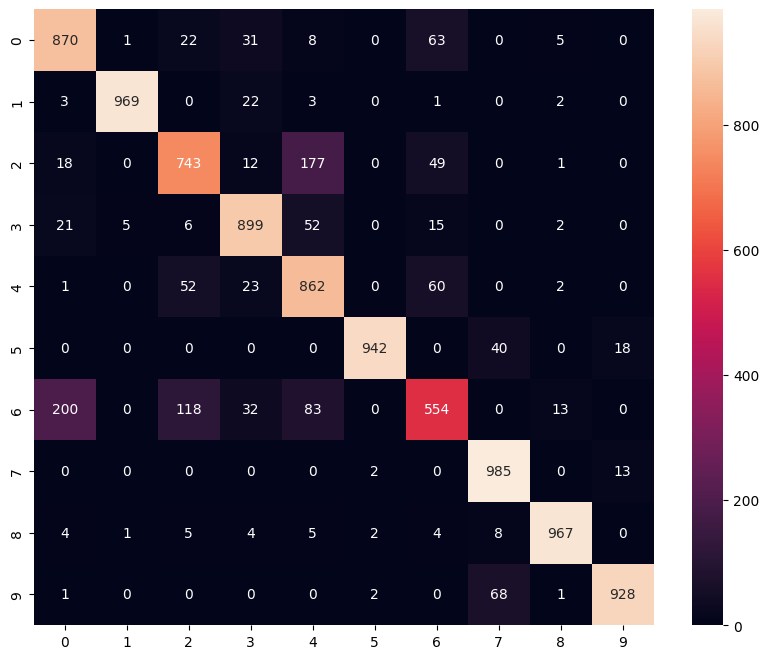

In [17]:
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx, annot=True, fmt='g')